In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


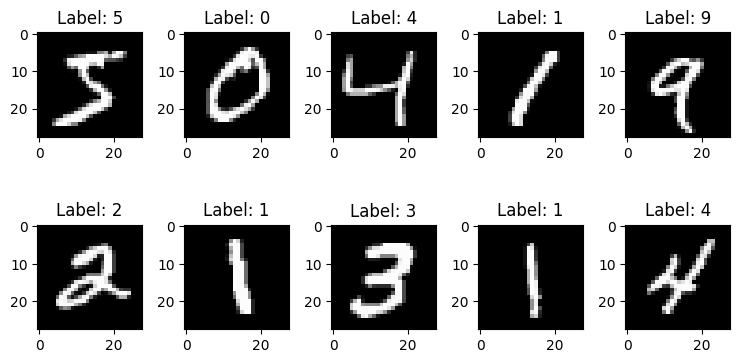

In [ ]:
import matplotlib.pyplot as plt


num = 10
images = x_train[:num]
labels = y_train[:num]

num_row = 2
num_col = 5

# plot images

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

for i in range(num):

    ax = axes[i//num_col, i%num_col]

    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
# no softmax

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# from logits for 'no softmax'
# Sparse for 'no one-hot' labels

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0196 - accuracy: 0.9930
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0194 - accuracy: 0.9933
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0171 - accuracy: 0.9943
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0179 - accuracy: 0.9937
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.9946
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0154 - accuracy: 0.9944
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0142 - accuracy: 0.9951
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0176 - accuracy: 0.9939

In [ ]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9811


[0.07358463108539581, 0.9811000227928162]

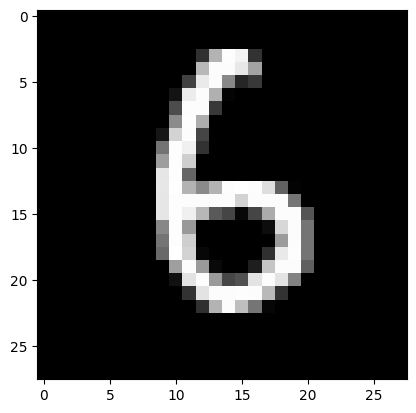

In [ ]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample = 21
image = x_test[sample]
plt.grid(False)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
y_test[sample]

6

In [ ]:
x_test[sample].shape

(28, 28)

In [ ]:
test_sample = x_test[sample].reshape(1,28,28)

In [ ]:
model.predict(test_sample)

1/1 [==============================] - 0s 92ms/step


array([[-10.947834 , -26.459927 , -11.497351 , -15.619906 ,  -3.268437 ,
          2.4048502,  12.8831415, -19.547707 ,  -5.539465 , -13.538502 ]],
      dtype=float32)

In [ ]:
prob_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
prob_model.predict(test_sample)

1/1 [==============================] - 0s 68ms/step


array([[4.4702003e-11, 8.1942794e-18, 2.5803229e-11, 4.1809145e-13,
        9.6704383e-08, 2.8139964e-05, 9.9997175e-01, 8.2309461e-15,
        9.9804698e-09, 3.3513075e-12]], dtype=float32)

In [ ]:
a = prob_model.predict(test_sample)
a.max()

1/1 [==============================] - 0s 16ms/step


0.99997175